In [1]:
from numpy import *
from pathlib import Path

In [3]:
#主成分分析（principal component analysis）用于实现降维的目的。数据通过从原来的坐标系转换到
#新的坐标系。第一个坐标系选择的是原始数据中方差最大的方向，第二个新坐标轴的选择和第一个坐标轴正交
#且具有最大方差的方向。该过程一直重复，直到重复次数达到特征的数目。

In [12]:
def loadDataSet(fileName,delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    dataArr = [list(map(float,line)) for line in stringArr]
    return mat(dataArr)

In [28]:
def pca(dataMat,topNfeat = 9999):
    meanVals = mean(dataMat,axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar = 0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:,eigValInd]

    lowDDatMat = meanRemoved * redEigVects
    
    reconMat = (lowDDatMat * redEigVects.T) + meanVals
    return lowDDatMat,reconMat
    

In [21]:
data_path = Path('D:\python_algorithm\machinelearinginaction\《机器学习实战》Python3代码\Ch13')

In [22]:
dataMat = loadDataSet(data_path / 'testSet.txt')

In [29]:
lowData,reconMat = pca(dataMat,1)

In [30]:
reconMat

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        ...,
        [ 9.32502753,  9.52436704],
        [ 9.0946364 ,  9.14637075],
        [ 9.16271152,  9.2580597 ]])

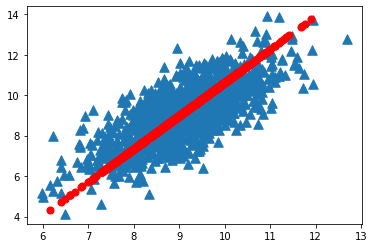

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0],marker='^',s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0],marker='o',s=50,c='red')